In this notebook we are going to analyse some of the cryptocurrency prices and forecast the price of BTC.

Note : I have observed that XRP and Ethereum has some inconsistency with the given data values so, all of their graph is not correctly plotted.

In [372]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import numpy as np
import math
import seaborn as sns
py.init_notebook_mode(connected=True)

In [373]:
df_btc = pd.read_csv('coin_Bitcoin.csv',parse_dates = ['Date'], index_col = ['Date'])
df_xrm = pd.read_csv('coin_Monero.csv',parse_dates = ['Date'], index_col = ['Date'])
df_eth = pd.read_csv('coin_Ethereum.csv',parse_dates = ['Date'], index_col = ['Date'])
df_trx = pd.read_csv('coin_Tron.csv',parse_dates = ['Date'], index_col = ['Date'])
df_xrp = pd.read_csv('coin_Ripple.csv',parse_dates = ['Date'], index_col = ['Date'])
df_tether = pd.read_csv('coin_Tether.csv',parse_dates = ['Date'], index_col = ['Date'])
df_xlm = pd.read_csv('coin_Stellar.csv',parse_dates = ['Date'], index_col = ['Date'])
df_sol = pd.read_csv('coin_Solana.csv',parse_dates = ['Date'], index_col = ['Date'])
df_lit = pd.read_csv('coin_Litecoin.csv',parse_dates = ['Date'], index_col = ['Date'])

In [374]:
df_btc['Quantum'] = df_btc['Low'].diff()

## BTC first month low and quantum plot

In [375]:
#Finding the first year
df_btc.index.year.min()

2013

In [376]:
#Finding the first month of the given first year
df_btc.loc['2013'].index.month.min()

4

In [377]:
df_btc_first_month = df_btc.loc['04-2013']

Text(0.5, 1.0, 'BTC first month low and quantum plot')

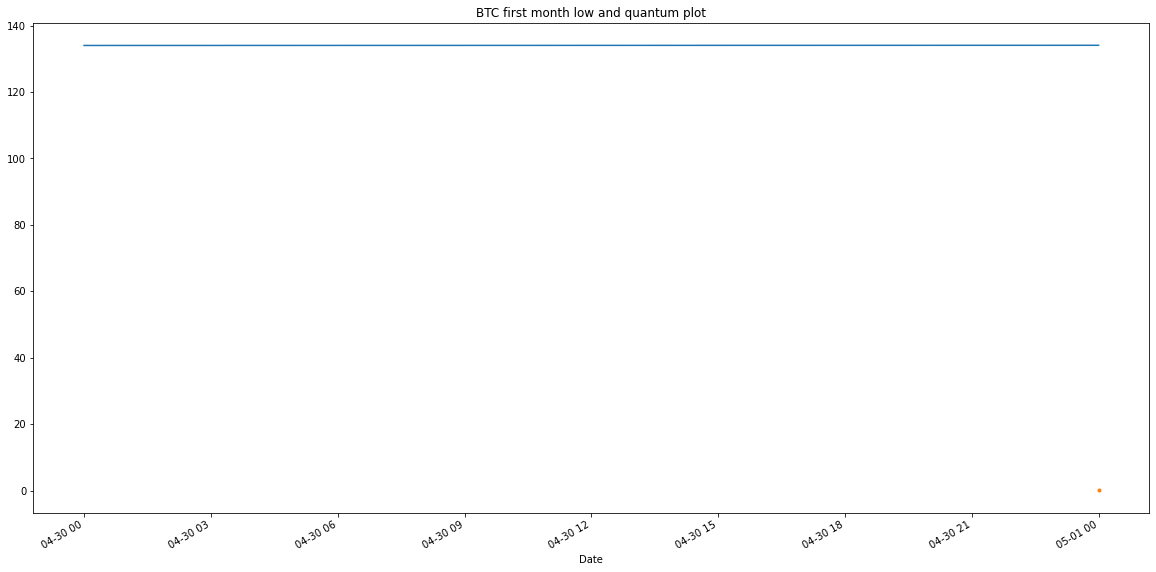

In [378]:
plt.figure(figsize = (20,10))
df_btc_first_month['Low'].plot()
plt.plot(df_btc_first_month['Quantum'],'.')
plt.title('BTC first month low and quantum plot')

In [379]:
df_btc_first_month

SNo     Name Symbol        High         Low     Open  \
Date                                                                        
2013-04-29 23:59:59    1  Bitcoin    BTC  147.488007  134.000000  134.444   
2013-04-30 23:59:59    2  Bitcoin    BTC  146.929993  134.050003  144.000   

                          Close  Volume     Marketcap   Quantum  
Date                                                             
2013-04-29 23:59:59  144.539993     0.0  1.603769e+09       NaN  
2013-04-30 23:59:59  139.000000     0.0  1.542813e+09  0.050003

We can see for the available data for the first month, there are only 2 observations so, Low plot came out to be straight line and quantum plot came out to be a point in the graph.

## BTC last month low and quantum plot

In [380]:
#Finding the last year
df_btc.index.year.max()

2021

In [381]:
#Finding the first month of the given first year
df_btc.loc['2021'].index.month.max()

7

In [382]:
df_btc_last_month = df_btc.loc['07-2021']

Text(0.5, 1.0, 'BTC last month low and quantum plot')

<Figure size 1440x720 with 0 Axes>

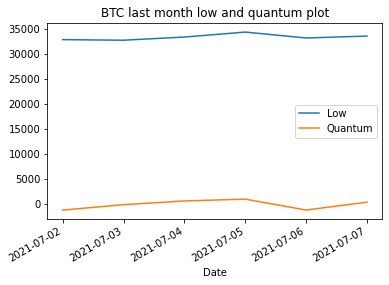

In [383]:
plt.figure(figsize = (20,10))
df_btc_last_month[['Low','Quantum']].plot()
plt.title('BTC last month low and quantum plot')

In [384]:
df_btc_last_month

SNo     Name Symbol          High           Low  \
Date                                                                    
2021-07-01 23:59:59  2986  Bitcoin    BTC  35035.982712  32883.781226   
2021-07-02 23:59:59  2987  Bitcoin    BTC  33939.588699  32770.680780   
2021-07-03 23:59:59  2988  Bitcoin    BTC  34909.259899  33402.696536   
2021-07-04 23:59:59  2989  Bitcoin    BTC  35937.567147  34396.477458   
2021-07-05 23:59:59  2990  Bitcoin    BTC  35284.344430  33213.661034   
2021-07-06 23:59:59  2991  Bitcoin    BTC  35038.536363  33599.916169   

                             Open         Close        Volume     Marketcap  \
Date                                                                          
2021-07-01 23:59:59  35035.982712  33572.117653  3.783896e+10  6.293393e+11   
2021-07-02 23:59:59  33549.600177  33897.048590  3.872897e+10  6.354508e+11   
2021-07-03 23:59:59  33854.421362  34668.548402  2.438396e+10  6.499397e+11   
2021-07-04 23:59:59  34665.564866  35287.779766  2.492431e+10  6.615748e+11   
2021-07-05 23:59:59  35284.344430  33746.002456  2.672155e+10  6.326962e+11   
2021-07-06 23:59:59  33723.509655  34235.193451  2.650126e+10  6.418992e+11   

                         Quantum  
Date                              
2021-07-01 23:59:59 -1202.370652  
2021-07-02 23:59:59  -113.100446  
2021-07-03 23:59:59   632.015756  
2021-07-04 23:59:59   993.780921  
2021-07-05 23:59:59 -1182.816424  
2021-07-06 23:59:59   386.255135

## Ethereum’s ‘High’ for first 15 and last 10 days.

<AxesSubplot:xlabel='Date'>

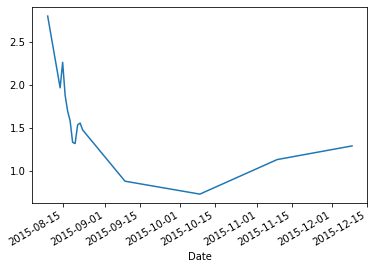

In [385]:
df_eth[0:15]['High'].plot()

<AxesSubplot:xlabel='Date'>

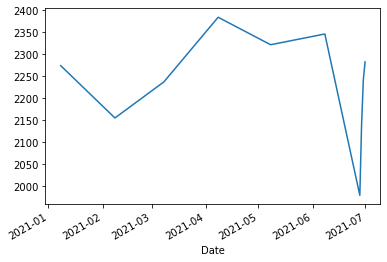

In [386]:
df_eth[-10:]['High'].plot()

## 5 day Moving/Rolling Average of Volume Traded for every coin in given period: 01/01/20 – 31/01/20

In [387]:
# create 5 days simple Volume moving average column
df_btc['5_VMA'] = df_btc['Volume'].rolling(window = 5, min_periods = 1).mean()
df_xrm['5_VMA'] = df_xrm['Volume'].rolling(window = 5, min_periods = 1).mean()
df_eth['5_VMA'] = df_eth['Volume'].rolling(window = 5, min_periods = 1).mean()
df_trx['5_VMA'] = df_trx['Volume'].rolling(window = 5, min_periods = 1).mean()
df_xrp['5_VMA'] = df_xrp['Volume'].rolling(window = 5, min_periods = 1).mean() 
df_tether['5_VMA'] = df_tether['Volume'].rolling(window = 5, min_periods = 1).mean() 
df_xlm['5_VMA'] = df_xlm['Volume'].rolling(window = 5, min_periods = 1).mean()
df_sol['5_VMA'] = df_sol['Volume'].rolling(window = 5, min_periods = 1).mean() 
df_lit['5_VMA'] = df_lit['Volume'].rolling(window = 5, min_periods = 1).mean()

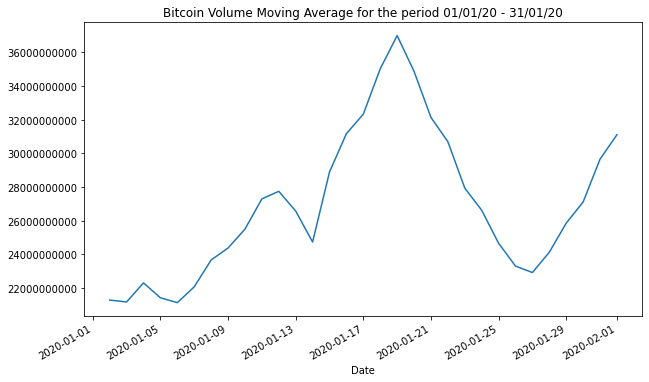

In [388]:
df_btc['5_VMA'].loc['01/01/20':'31/01/20'].plot(figsize = (10,6))
plt.title('Bitcoin Volume Moving Average for the period 01/01/20 - 31/01/20')
plt.ticklabel_format(useOffset=False,style='plain', axis='y')

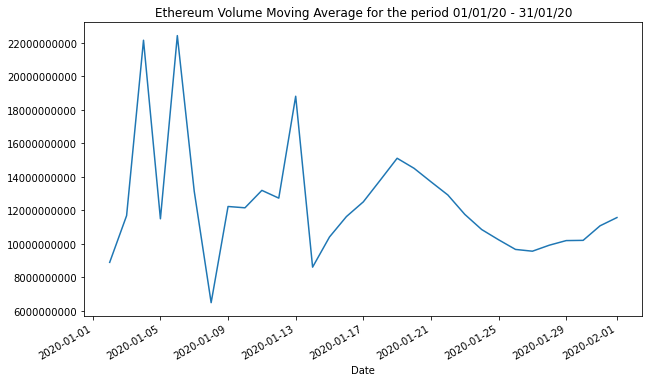

In [389]:
df_eth.sort_index()['5_VMA'].loc['01/01/20':'31/01/20'].plot(figsize = (10,6))
plt.title('Ethereum Volume Moving Average for the period 01/01/20 - 31/01/20')
plt.ticklabel_format(useOffset=False,style='plain', axis='y')

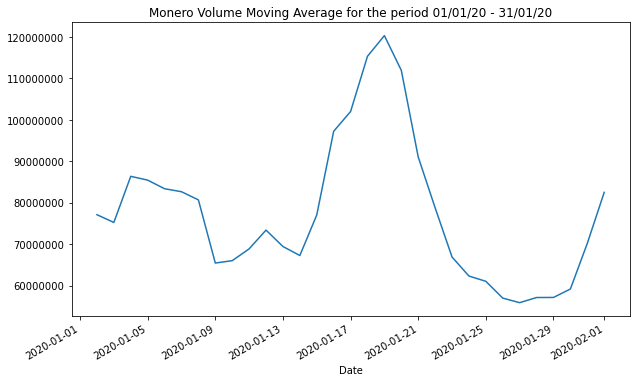

In [390]:
df_xrm['5_VMA'].loc['01/01/20':'31/01/20'].plot(figsize = (10,6))
plt.title('Monero Volume Moving Average for the period 01/01/20 - 31/01/20')
plt.ticklabel_format(useOffset=False,style='plain', axis='y')

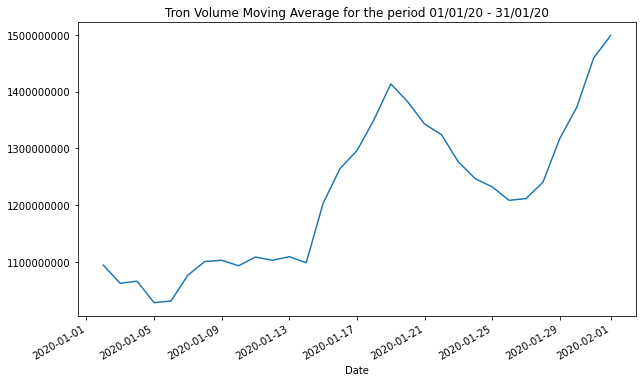

In [391]:
df_trx['5_VMA'].loc['01/01/20':'31/01/20'].plot(figsize = (10,6))
plt.title('Tron Volume Moving Average for the period 01/01/20 - 31/01/20')
plt.ticklabel_format(useOffset=False,style='plain', axis='y')
plt.ticklabel_format(useOffset=False,style='plain', axis='y')

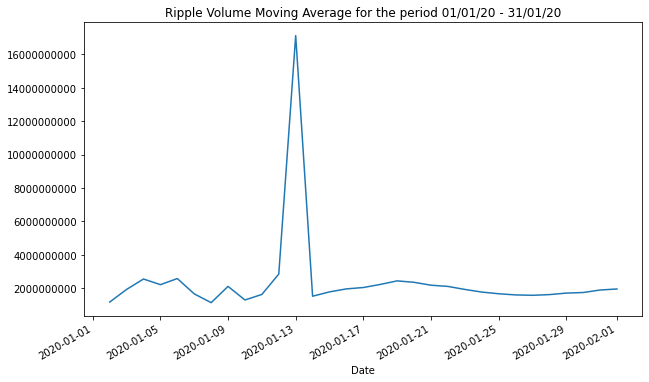

In [392]:
df_xrp.sort_index()['5_VMA'].loc['01/01/20':'31/01/20'].plot(figsize = (10,6))
plt.title('Ripple Volume Moving Average for the period 01/01/20 - 31/01/20')
plt.ticklabel_format(useOffset=False,style='plain', axis='y')

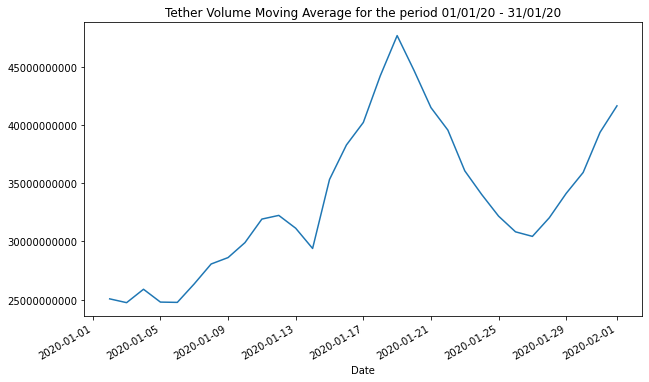

In [393]:
df_tether['5_VMA'].loc['01/01/20':'31/01/20'].plot(figsize = (10,6))
plt.title('Tether Volume Moving Average for the period 01/01/20 - 31/01/20')
plt.ticklabel_format(useOffset=False,style='plain', axis='y')

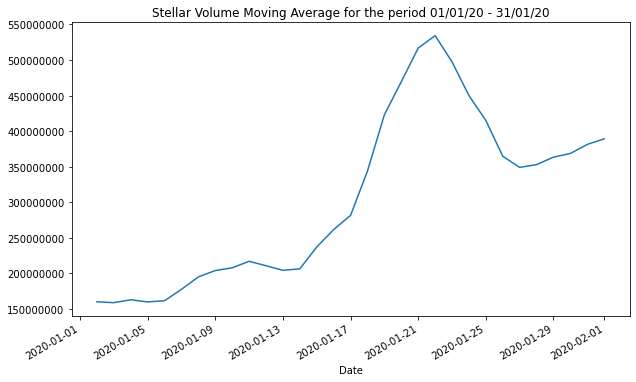

In [394]:
df_xlm['5_VMA'].loc['01/01/20':'31/01/20'].plot(figsize = (10,6))
plt.title('Stellar Volume Moving Average for the period 01/01/20 - 31/01/20')
plt.ticklabel_format(useOffset=False,style='plain', axis='y')

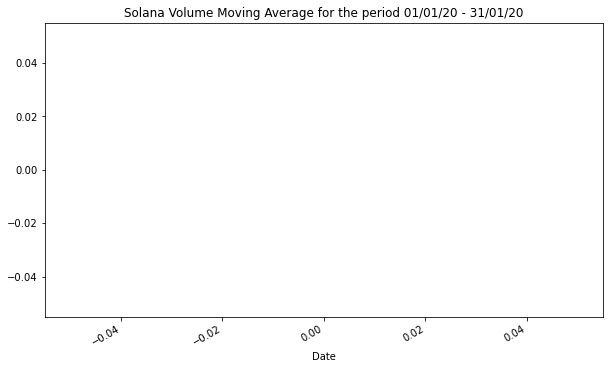

In [395]:
df_sol.sort_index()['5_VMA'].loc['01/01/20':'31/01/20'].plot(figsize = (10,6))
plt.title('Solana Volume Moving Average for the period 01/01/20 - 31/01/20')
plt.ticklabel_format(useOffset=False,style='plain', axis='y')

Data for Solana is not given for the timeframe 01/01/20 to 31/01/20.

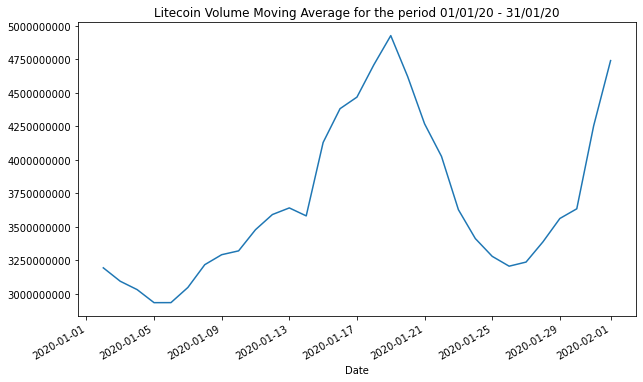

In [396]:
df_lit['5_VMA'].loc['01/01/20':'31/01/20'].plot(figsize = (10,6))
plt.title('Litecoin Volume Moving Average for the period 01/01/20 - 31/01/20')
plt.ticklabel_format(useOffset=False,style='plain', axis='y')

## Comparison of Market Cap of all coins

Data for Solana is not provided for the Date 01/04/20, so excluding it in the next graphs.

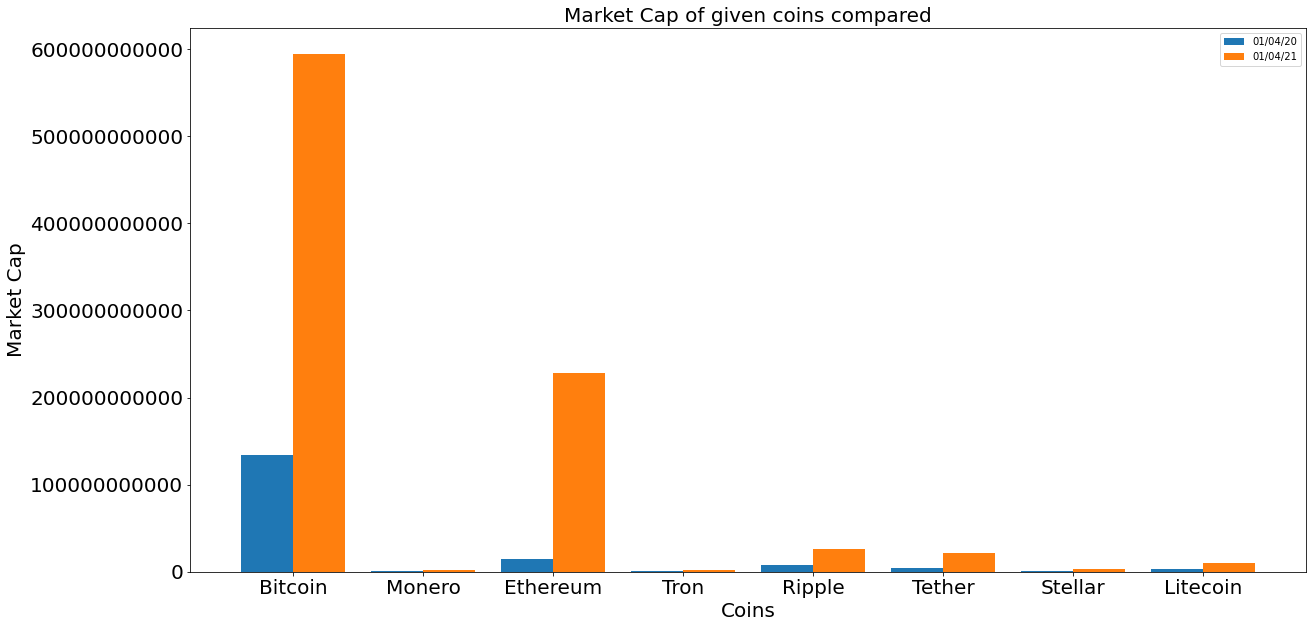

In [397]:
coins_exp_sol = ['Bitcoin','Monero','Ethereum','Tron','Ripple','Tether','Stellar','Litecoin']
inital = [df_btc.loc['01/04/20']['Marketcap'][0],
          df_xrm.loc['01/04/20']['Marketcap'][0],df_eth.loc['01/04/20']['Marketcap'][0],
          df_trx.loc['01/04/20']['Marketcap'][0],df_xrp.loc['01/04/20']['Marketcap'][0],
         df_tether.loc['01/04/20']['Marketcap'][0],df_xlm.loc['01/04/20']['Marketcap'][0]
          ,df_lit.loc['01/04/20']['Marketcap'][0]]
later = [df_btc.loc['01/04/21']['Marketcap'][0],
        df_xrm.loc['01/04/21']['Marketcap'][0],df_eth.loc['01/04/21']['Marketcap'][0],
        df_trx.loc['01/04/21']['Marketcap'][0],df_xrp.loc['01/04/21']['Marketcap'][0],
         df_tether.loc['01/04/21']['Marketcap'][0],df_xlm.loc['01/04/21']['Marketcap'][0]
         ,df_lit.loc['01/04/21']['Marketcap'][0]]

X_axis = np.arange(len(coins_exp_sol))

plt.figure(figsize = (20,10))
plt.bar(X_axis - 0.2, inital, 0.4, label = '01/04/20')
plt.bar(X_axis + 0.2, later, 0.4, label = '01/04/21')
plt.xticks(X_axis, coins_exp_sol)
plt.xlabel("Coins" , size = 20)
plt.ylabel("Market Cap" , size = 20)
plt.title("Market Cap of given coins compared" , size = 20)
plt.xticks(fontsize=20,rotation = 0)
plt.yticks(fontsize=20)
plt.legend()
plt.ticklabel_format(useOffset=False,style='plain', axis='y')
plt.show()

In [398]:
df = pd.DataFrame(dict(coins_exp_sol=coins_exp_sol*2, marketcap_total=inital + later,
                       Date=['01/04/20']*len(coins_exp_sol) + ['01/04/21']*len(coins_exp_sol)))

fig = px.scatter(df, x="marketcap_total", y="coins_exp_sol", color="Date",
                 title="Market Cap of given coins compared",
                 labels={"marketcap_total":"Market cap"}
                )

fig.show()

## Initial Sale Date of Every Coin Compared

([<matplotlib.axis.XTick at 0x31af0d1c0>,
 [Text(0, 0, 'Bitcoin'),
  Text(1, 0, 'Monero'),
  Text(2, 0, 'Ethereum'),
  Text(3, 0, 'Tron'),
  Text(4, 0, 'Ripple'),
  Text(5, 0, 'Tether'),
  Text(6, 0, 'Stellar'),
  Text(7, 0, 'Solana'),
  Text(8, 0, 'Litecoin')])

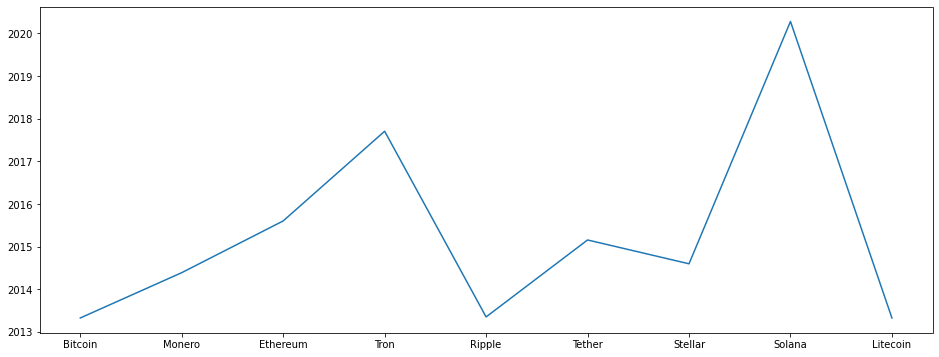

In [399]:
coins = ['Bitcoin','Monero','Ethereum','Tron','Ripple','Tether','Stellar','Solana','Litecoin']

y = [df_btc.index[0],
df_xrm.index[0],
df_eth.index[0],
df_trx.index[0],
df_xrp.index[0],
df_tether.index[0],
df_xlm.index[0],
df_sol.index[0],
df_lit.index[0]]

plt.figure(figsize = (16,6))
plt.plot(y)
plt.xticks([0,1,2,3,4,5,6,7,8],coins)

In [400]:
y1 = []
for i in y:
    y1.append(i.year)

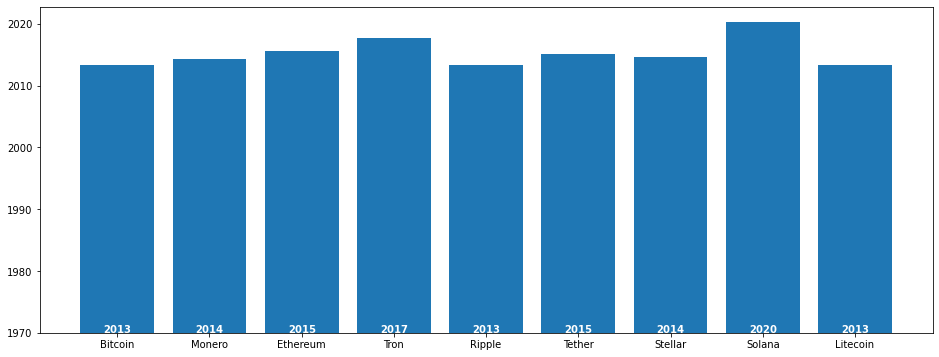

In [401]:
plt.figure(figsize = (16,6))
plt.bar([i for i in range(9)],y)
plt.xticks([0,1,2,3,4,5,6,7,8],coins)
for i, v in enumerate(y):
    plt.text(i-0.15, i , str(v.year), color='white', fontweight='bold')

## Candlesticks Charts

In [402]:
data_btc = [go.Candlestick(x=df_btc.index,
                       open=df_btc.Open,
                       high=df_btc.High,
                       low=df_btc.Low,
                       close=df_btc.Close)]

In [403]:
layout = go.Layout(title='Bitcoin Candlestick Chart with Range Slider',
                   xaxis={'rangeselector':{'buttons':[{'count':7,
                                                      'label':'1W',
                                                      'step':'day',
                                                      'stepmode':'backward'},
                                                     {'count':1,
                                                      'label':'1M',
                                                      'step':'month',
                                                      'stepmode':'backward'},
                                                    {'count':3,
                                                      'label':'3M',
                                                      'step':'month',
                                                      'stepmode':'backward'},
                                                    {'count':6,
                                                      'label':'6M',
                                                      'step':'month',
                                                      'stepmode':'backward'},
                                                    {'count':1,
                                                      'label':'1Y',
                                                      'step':'year',
                                                      'stepmode':'backward'},
                                                      ]
                          },
                         'rangeslider':{'visible':True}})

In [404]:
fig = go.Figure(data=data_btc,layout=layout)
py.iplot(fig,filename='bitcoin_candlestick')

In [405]:
data_eth = [go.Candlestick(x=df_eth.index,
                       open=df_eth.Open,
                       high=df_eth.High,
                       low=df_eth.Low,
                       close=df_eth.Close)]

In [406]:
layout = go.Layout(title='Ethereum Candlestick Chart with Range Slider',
                   xaxis={'rangeselector':{'buttons':[{'count':7,
                                                      'label':'1W',
                                                      'step':'day',
                                                      'stepmode':'backward'},
                                                     {'count':1,
                                                      'label':'1M',
                                                      'step':'month',
                                                      'stepmode':'backward'},
                                                    {'count':3,
                                                      'label':'3M',
                                                      'step':'month',
                                                      'stepmode':'backward'},
                                                    {'count':6,
                                                      'label':'6M',
                                                      'step':'month',
                                                      'stepmode':'backward'},
                                                    {'count':1,
                                                      'label':'1Y',
                                                      'step':'year',
                                                      'stepmode':'backward'},
                                                      ]
                          },
                         'rangeslider':{'visible':True}})

In [407]:
fig = go.Figure(data=data_eth,layout=layout)
py.iplot(fig,filename='ethereum_candlestick')

There is some error with the given data for Ethereum.

In [408]:
data_xrm = [go.Candlestick(x=df_xrm.index,
                       open=df_xrm.Open,
                       high=df_xrm.High,
                       low=df_xrm.Low,
                       close=df_xrm.Close)]
layout = go.Layout(title='Ripple Candlestick Chart with Range Slider',
                   xaxis={'rangeselector':{'buttons':[{'count':7,
                                                      'label':'1W',
                                                      'step':'day',
                                                      'stepmode':'backward'},
                                                     {'count':1,
                                                      'label':'1M',
                                                      'step':'month',
                                                      'stepmode':'backward'},
                                                    {'count':3,
                                                      'label':'3M',
                                                      'step':'month',
                                                      'stepmode':'backward'},
                                                    {'count':6,
                                                      'label':'6M',
                                                      'step':'month',
                                                      'stepmode':'backward'},
                                                    {'count':1,
                                                      'label':'1Y',
                                                      'step':'year',
                                                      'stepmode':'backward'},
                                                      ]
                          },
                         'rangeslider':{'visible':True}})
fig = go.Figure(data=data_xrm,layout=layout)
py.iplot(fig,filename='Ripple_candlestick')

In [409]:
data_trx = [go.Candlestick(x=df_trx.index,
                       open=df_trx.Open,
                       high=df_trx.High,
                       low=df_trx.Low,
                       close=df_trx.Close)]
layout = go.Layout(title='Tron Candlestick Chart with Range Slider',
                   xaxis={'rangeselector':{'buttons':[{'count':7,
                                                      'label':'1W',
                                                      'step':'day',
                                                      'stepmode':'backward'},
                                                     {'count':1,
                                                      'label':'1M',
                                                      'step':'month',
                                                      'stepmode':'backward'},
                                                    {'count':3,
                                                      'label':'3M',
                                                      'step':'month',
                                                      'stepmode':'backward'},
                                                    {'count':6,
                                                      'label':'6M',
                                                      'step':'month',
                                                      'stepmode':'backward'},
                                                    {'count':1,
                                                      'label':'1Y',
                                                      'step':'year',
                                                      'stepmode':'backward'},
                                                      ]
                          },
                         'rangeslider':{'visible':True}})
fig = go.Figure(data=data_trx,layout=layout)
py.iplot(fig,filename='Tron_candlestick')

In [410]:
data_xrp = [go.Candlestick(x=df_xrp.index,
                       open=df_xrp.Open,
                       high=df_xrp.High,
                       low=df_xrp.Low,
                       close=df_xrp.Close)]
layout = go.Layout(title='Ripple Candlestick Chart with Range Slider',
                   xaxis={'rangeselector':{'buttons':[{'count':7,
                                                      'label':'1W',
                                                      'step':'day',
                                                      'stepmode':'backward'},
                                                     {'count':1,
                                                      'label':'1M',
                                                      'step':'month',
                                                      'stepmode':'backward'},
                                                    {'count':3,
                                                      'label':'3M',
                                                      'step':'month',
                                                      'stepmode':'backward'},
                                                    {'count':6,
                                                      'label':'6M',
                                                      'step':'month',
                                                      'stepmode':'backward'},
                                                    {'count':1,
                                                      'label':'1Y',
                                                      'step':'year',
                                                      'stepmode':'backward'},
                                                      ]
                          },
                         'rangeslider':{'visible':True}})
fig = go.Figure(data=data_xrp,layout=layout)
py.iplot(fig,filename='Ripple_candlestick')

There is some error with the given data for Ripple.

In [411]:
data_tether = [go.Candlestick(x=df_tether.index,
                       open=df_tether.Open,
                       high=df_tether.High,
                       low=df_tether.Low,
                       close=df_tether.Close)]
layout = go.Layout(title='Tether Candlestick Chart with Range Slider',
                   xaxis={'rangeselector':{'buttons':[{'count':7,
                                                      'label':'1W',
                                                      'step':'day',
                                                      'stepmode':'backward'},
                                                     {'count':1,
                                                      'label':'1M',
                                                      'step':'month',
                                                      'stepmode':'backward'},
                                                    {'count':3,
                                                      'label':'3M',
                                                      'step':'month',
                                                      'stepmode':'backward'},
                                                    {'count':6,
                                                      'label':'6M',
                                                      'step':'month',
                                                      'stepmode':'backward'},
                                                    {'count':1,
                                                      'label':'1Y',
                                                      'step':'year',
                                                      'stepmode':'backward'},
                                                      ]
                          },
                         'rangeslider':{'visible':True}})
fig = go.Figure(data=data_tether,layout=layout)
py.iplot(fig,filename='Tether_candlestick')

In [412]:
data_xlm = [go.Candlestick(x=df_xlm.index,
                       open=df_xlm.Open,
                       high=df_xlm.High,
                       low=df_xlm.Low,
                       close=df_xlm.Close)]
layout = go.Layout(title='Stellar Candlestick Chart with Range Slider',
                   xaxis={'rangeselector':{'buttons':[{'count':7,
                                                      'label':'1W',
                                                      'step':'day',
                                                      'stepmode':'backward'},
                                                     {'count':1,
                                                      'label':'1M',
                                                      'step':'month',
                                                      'stepmode':'backward'},
                                                    {'count':3,
                                                      'label':'3M',
                                                      'step':'month',
                                                      'stepmode':'backward'},
                                                    {'count':6,
                                                      'label':'6M',
                                                      'step':'month',
                                                      'stepmode':'backward'},
                                                    {'count':1,
                                                      'label':'1Y',
                                                      'step':'year',
                                                      'stepmode':'backward'},
                                                      ]
                          },
                         'rangeslider':{'visible':True}})
fig = go.Figure(data=data_xlm,layout=layout)
py.iplot(fig,filename='Stellar_candlestick')

In [413]:
data_lit = [go.Candlestick(x=df_lit.index,
                       open=df_lit.Open,
                       high=df_lit.High,
                       low=df_lit.Low,
                       close=df_lit.Close)]
layout = go.Layout(title='Litecoin Candlestick Chart with Range Slider',
                   xaxis={'rangeselector':{'buttons':[{'count':7,
                                                      'label':'1W',
                                                      'step':'day',
                                                      'stepmode':'backward'},
                                                     {'count':1,
                                                      'label':'1M',
                                                      'step':'month',
                                                      'stepmode':'backward'},
                                                    {'count':3,
                                                      'label':'3M',
                                                      'step':'month',
                                                      'stepmode':'backward'},
                                                    {'count':6,
                                                      'label':'6M',
                                                      'step':'month',
                                                      'stepmode':'backward'},
                                                    {'count':1,
                                                      'label':'1Y',
                                                      'step':'year',
                                                      'stepmode':'backward'},
                                                      ]
                          },
                         'rangeslider':{'visible':True}})
fig = go.Figure(data=data_lit,layout=layout)
py.iplot(fig,filename='Litecoin_candlestick')

## Scatter plot for ‘Close’ Values of ETH and BTC for years: 2016,17,18 & 19.

Text(0, 0.5, 'Ethereum Close Price')

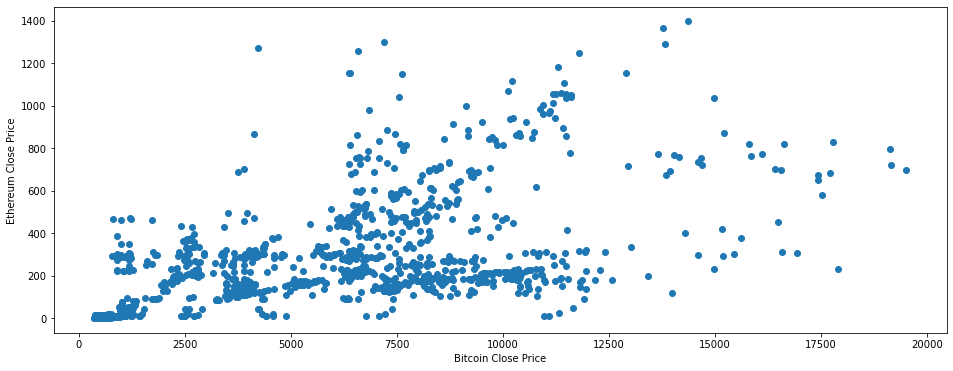

In [414]:
plt.figure(figsize = (16,6))
plt.scatter(x = df_btc['Close'].loc['2016':'2019'],y = df_eth.sort_index()['Close'].loc['2016':'2019'])
plt.xlabel("Bitcoin Close Price")
plt.ylabel("Ethereum Close Price")

## Observations

In [415]:
df = pd.DataFrame({'BTC' : df_btc['Close'],'XRM': df_xrm['Close'],'ETH' : df_eth['Close'],
                'TRX' : df_trx['Close'],'XRP' : df_xrp['Close'],'Tether' : df_tether['Close'],
                'XLM' : df_xlm['Close'],'SOL' : df_sol['Close'],'LIT' : df_lit['Close']})

In [416]:
df = df.pct_change().dropna()

In [417]:
df.head()

BTC       XRM       ETH       TRX       XRP  \
Date                                                                    
2020-04-12 23:59:00  0.000000  0.000000  0.415804  0.000000  1.343479   
2020-04-12 23:59:59  0.016330  0.007514  0.000000  0.033539  0.000000   
2020-04-13 23:59:00  0.000000  0.000000 -0.725514  0.000000 -0.663117   
2020-04-13 23:59:59 -0.018082 -0.019076  0.000000 -0.024594  0.000000   
2020-04-14 23:59:00  0.000000  0.000000  0.008426  0.000000 -0.012767   

                       Tether       XLM       SOL       LIT  
Date                                                         
2020-04-12 23:59:00  0.000000  0.000000  0.000000  0.000000  
2020-04-12 23:59:59  0.010072 -0.002213  0.136053  0.003100  
2020-04-13 23:59:00  0.000000  0.000000  0.000000  0.000000  
2020-04-13 23:59:59 -0.007778 -0.022282 -0.118611 -0.029351  
2020-04-14 23:59:00  0.000000  0.000000  0.000000  0.000000

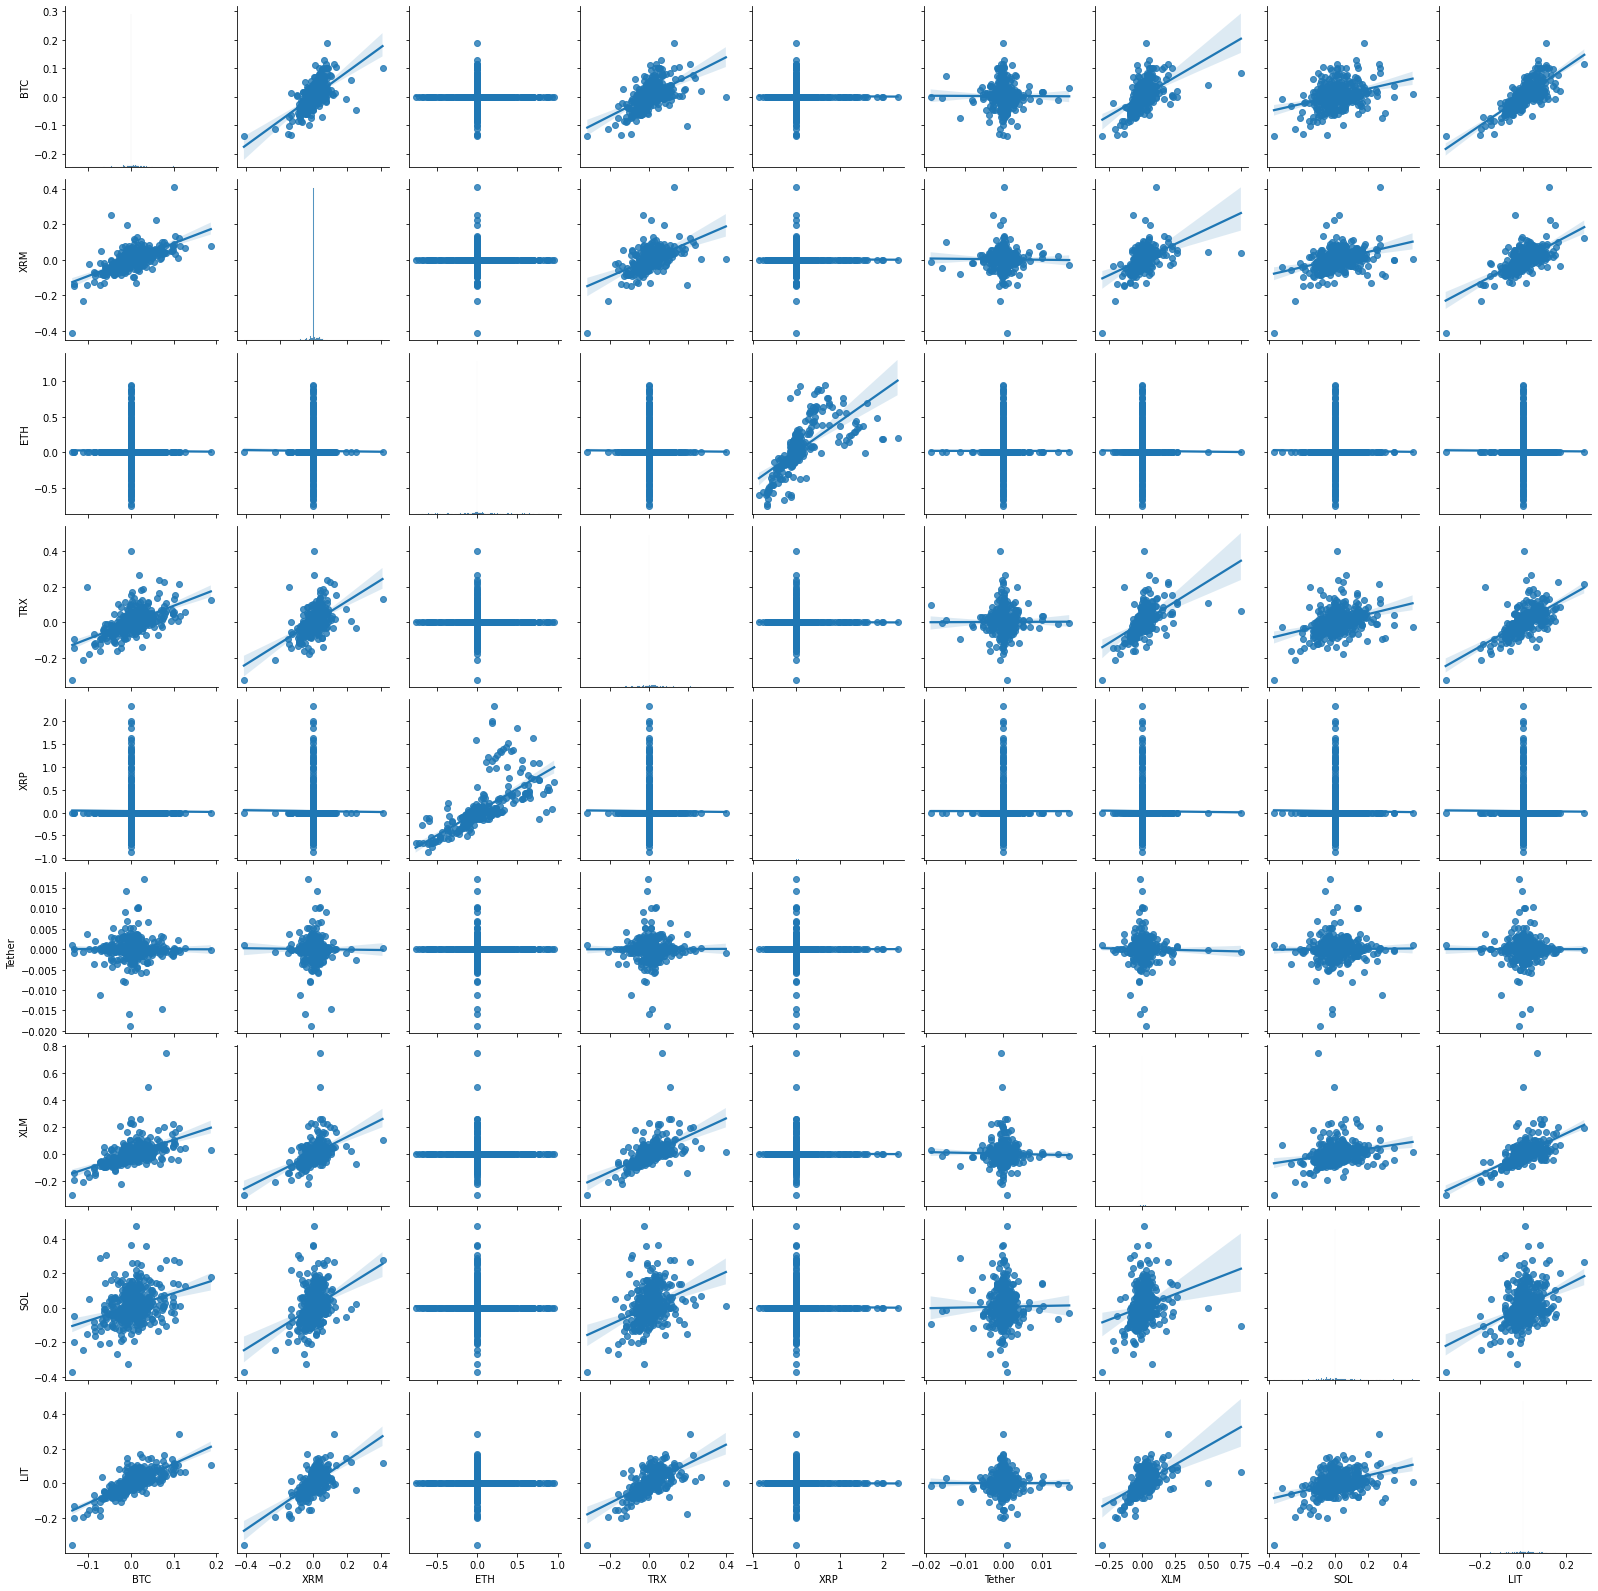

In [418]:
sns.pairplot(df, kind='reg')

We can observe each pair of the charts presented upside and check their corresponding relation. For example, We can see BTC has a positive regression line with each of the coins except XRP and ETH and Tether.Most probably, XRP and ETH has wrong data provided as we have seen earlier so they can be avoided. Tether is stable coin so it makes sense to not have a positive correlation with BTC. Other coins have positive correlation with BTC and the slope of the regression line corresponds to the strength of the correlation. 

We can also observe that the correlation between XLM and LIT is very strong positive correlation which means these coins are very likely to move in the same direction together.


*Positive correlation means when BTC goes up the coins with positive correlation with BTC will go up too and when BTC goes down the coins will go down too. Strength of correlation means how much the coins will go up or down depending on BTC.*

## SMA Crossover

The simple moving average (SMA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses. A moving average can act as support or resistance. In an uptrend, a 50-day, 100-day, or 200-day moving average may act as a support level. This is because the average acts like a floor (support), so the price bounces up off of it. In a downtrend, a moving average may act as resistance; like a ceiling, the price hits the level and then starts to drop again.

Crossover strategy is to apply two simple moving averages to a chart: one longer and one shorter. When the shorter-term SMA crosses above the longer-term SMA, it's a buy signal, as it indicates that the trend is shifting up. This is known as a golden cross. Meanwhile, when the shorter-term SMA crosses below the longer-term SMA, it's a sell signal, as it indicates that the trend is shifting down. This is known as a dead/death cross. Let us apply 50 day and 200 day Simple Moving Average to Bitcoin(2017 to 2021) chart and analyse the SMA crossover strategy.

In [419]:
# create 20 days simple moving average column
df_btc['200_SMA'] = df_btc['Close'].rolling(window = 200, min_periods = 1).mean()
# create 50 days simple moving average column
df_btc['50_SMA'] = df_btc['Close'].rolling(window = 50, min_periods = 1).mean()

In [420]:
df_btc['Signal'] = 0.0
df_btc['Signal'] = np.where(df_btc['50_SMA'] > df_btc['200_SMA'], 1.0, 0.0)
df_btc['Position'] = df_btc['Signal'].diff()

In [421]:
df_btc_MA_plot = df_btc.loc['2017':'2021']

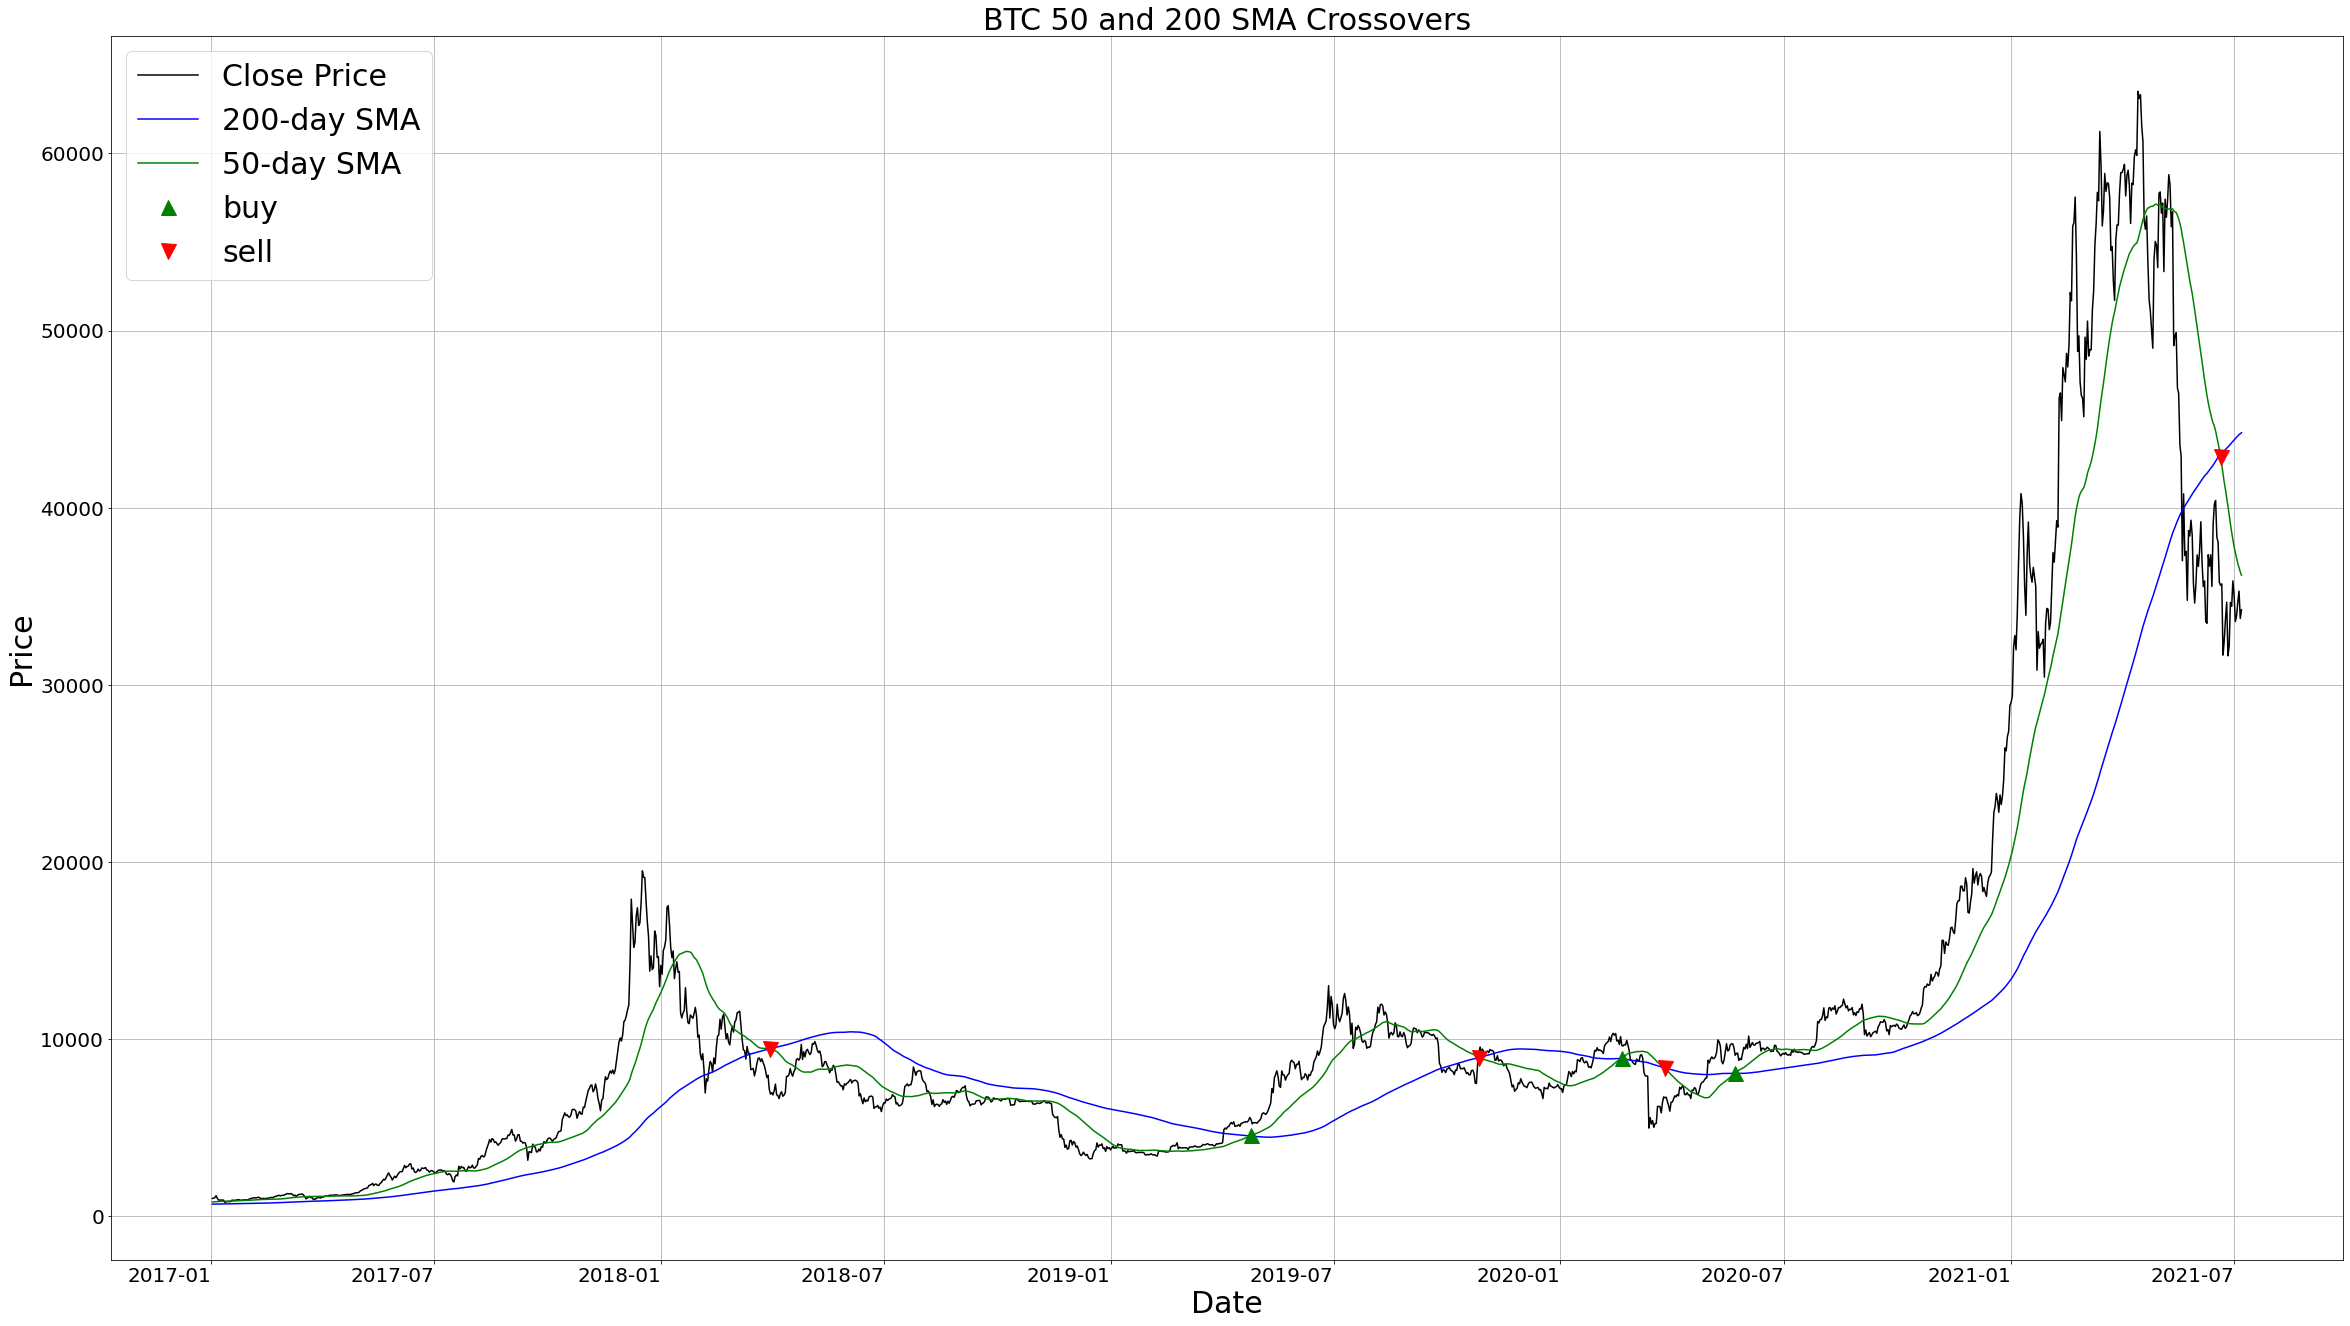

In [422]:
plt.figure(figsize = (40,25))
# plot close price, short-term and long-term moving averages 
df_btc_MA_plot['Close'].plot(color = 'k', label= 'Close Price') 
df_btc_MA_plot['200_SMA'].plot(color = 'b',label = '200-day SMA') 
df_btc_MA_plot['50_SMA'].plot(color = 'g', label = '50-day SMA')
# plot ‘buy’ signals
plt.plot(df_btc_MA_plot[df_btc_MA_plot['Position'] == 1].index, 
         df_btc_MA_plot['50_SMA'][df_btc_MA_plot['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'buy')
# plot ‘sell’ signals
plt.plot(df_btc_MA_plot[df_btc_MA_plot['Position'] == -1].index, 
         df_btc_MA_plot['50_SMA'][df_btc_MA_plot['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'sell')
plt.ylabel('Price', fontsize = 30 )
plt.xlabel('Date', fontsize = 30 )
plt.title('BTC', fontsize = 30)
plt.legend(prop={'size': 30})
plt.xticks(fontsize=20,rotation = 0)
plt.yticks(fontsize=20)
plt.title('BTC 50 and 200 SMA Crossovers',size = 30)
plt.grid()
plt.show()

In [423]:
df_btc['VWAP'] = (df_btc.Volume * (df_btc.High + df_btc.Low) / 2).cumsum() / df_btc.Volume.cumsum()
df_btc['VWAP_MEAN_DIFF'] = ((df_btc.High + df_btc.Low) / 2) - df_btc.VWAP
df_btc['SQ_DIFF'] = df_btc.VWAP_MEAN_DIFF.apply(lambda x: math.pow(x, 2))
df_btc['SQ_DIFF_MEAN'] = df_btc.SQ_DIFF.expanding().mean()
df_btc['STDEV_TT'] = df_btc.SQ_DIFF_MEAN.apply(math.sqrt)

stdev_multiple_1 = 1.28
stdev_multiple_2 = 2.01
stdev_multiple_3 = 2.51

df_btc['STDEV_1'] = df_btc.VWAP + stdev_multiple_3 * df_btc['STDEV_TT']
df_btc['STDEV_N1'] = df_btc.VWAP - stdev_multiple_3 * df_btc['STDEV_TT']

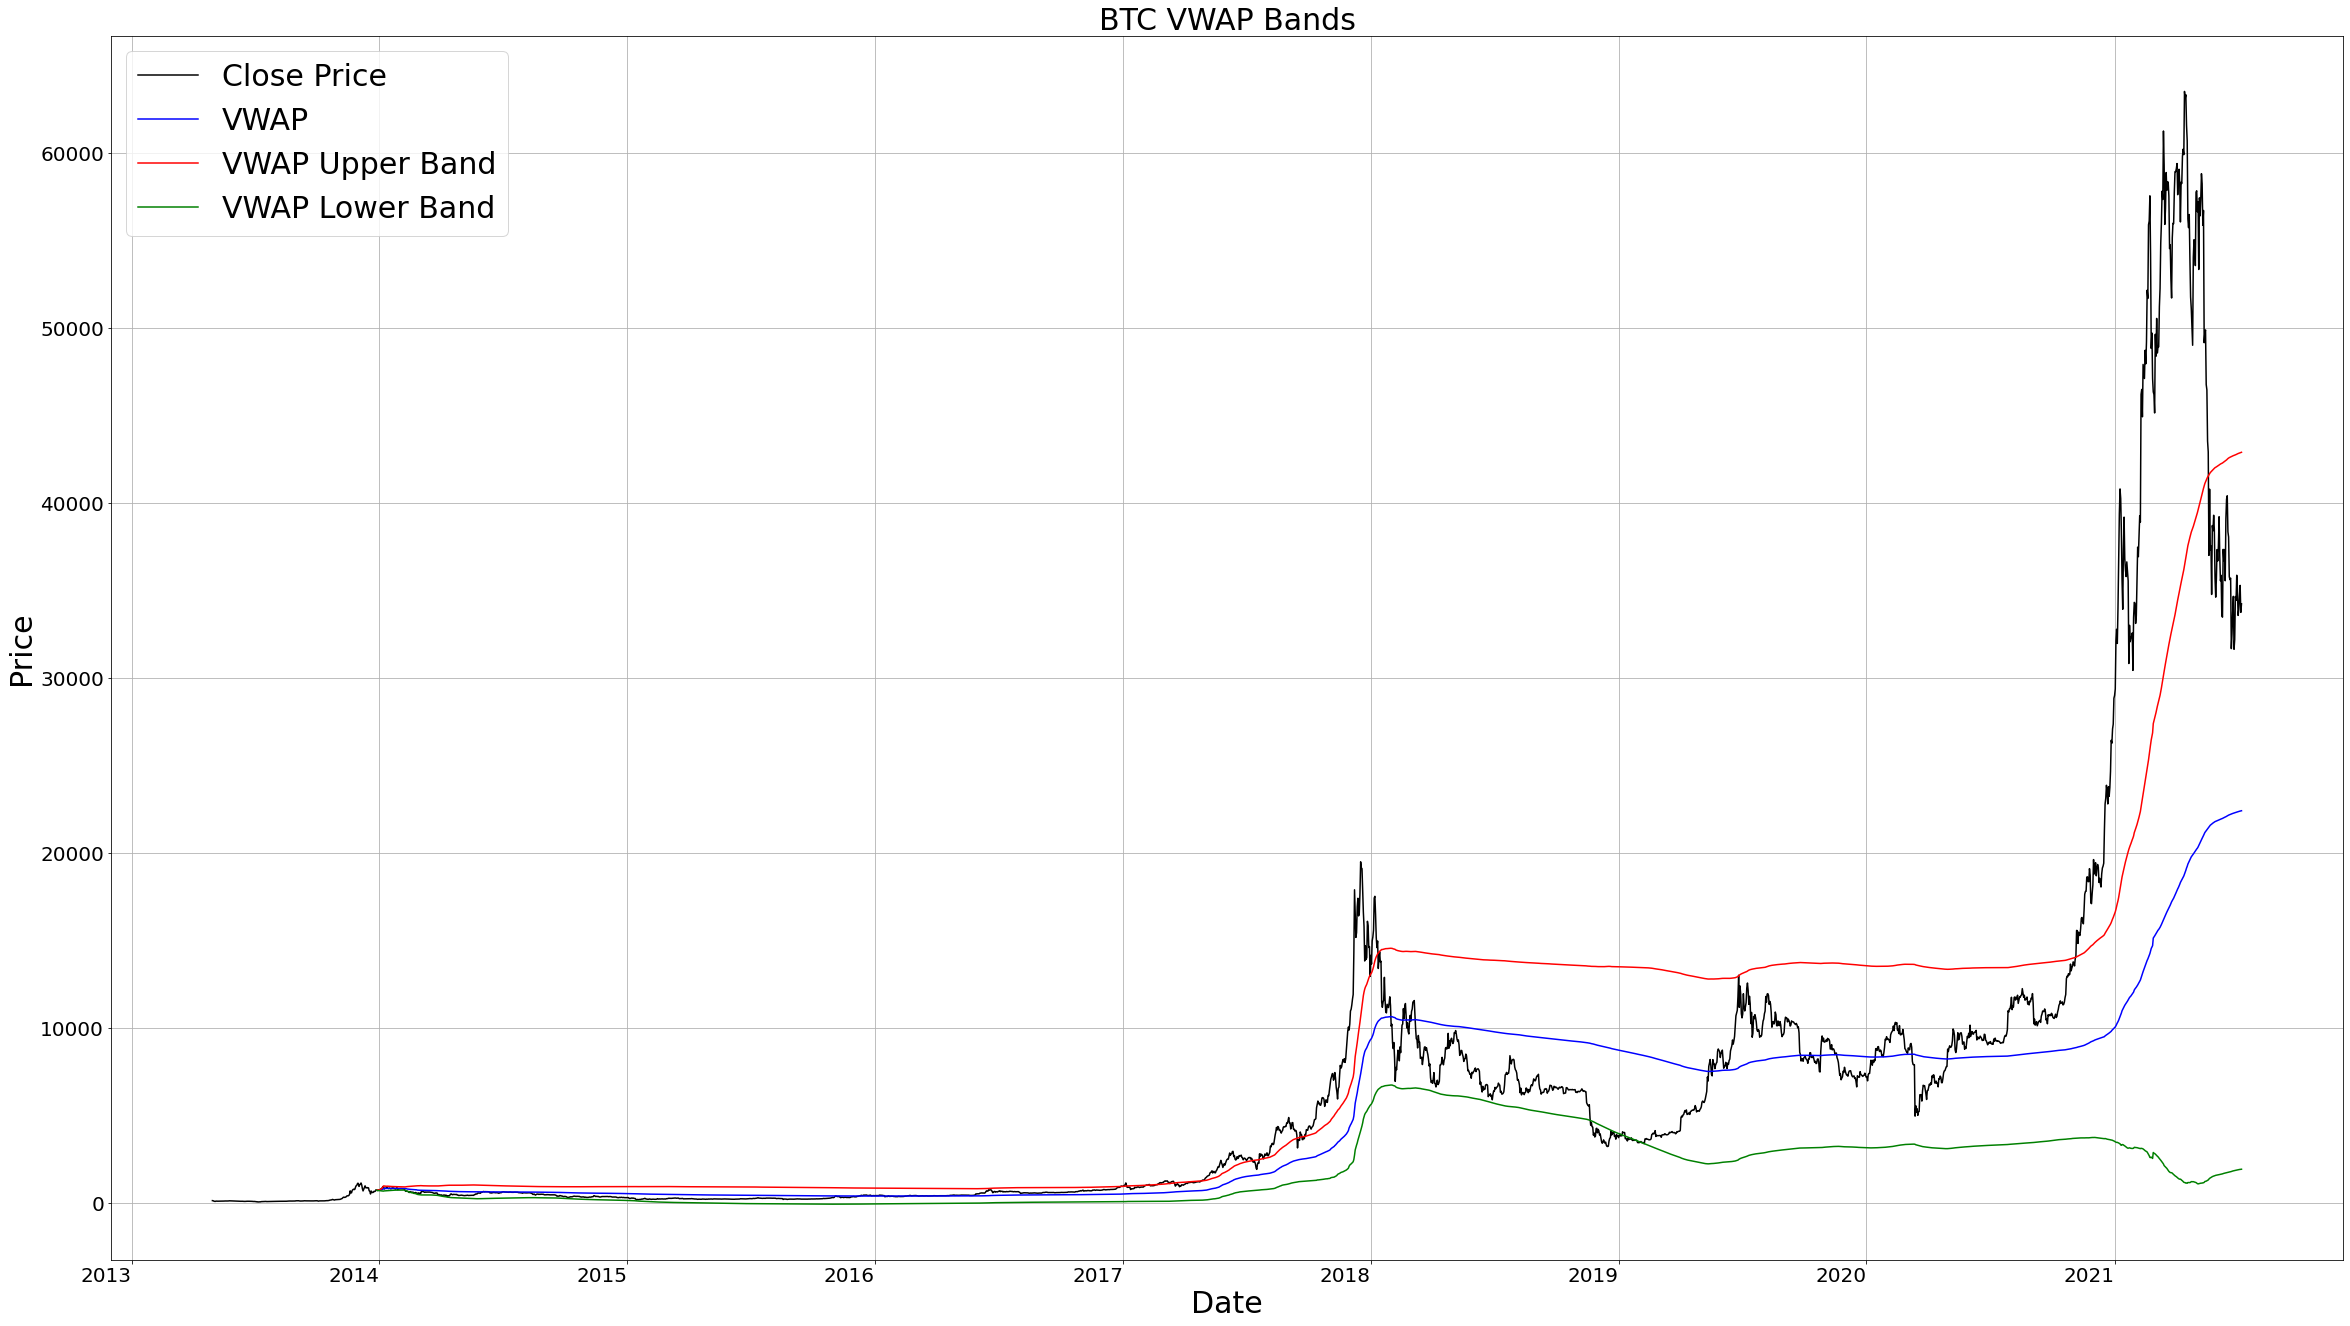

In [424]:
plt.figure(figsize = (40,25))
df_btc['Close'].plot(color = 'k', label= 'Close Price') 
df_btc['VWAP'].plot(color = 'b',label = 'VWAP')
df_btc['STDEV_1'].plot(color = 'r',label = 'VWAP Upper Band')
df_btc['STDEV_N1'].plot(color = 'g',label = 'VWAP Lower Band')
plt.ylabel('Price', fontsize = 30 )
plt.xlabel('Date', fontsize = 30 )
plt.title('BTC', fontsize = 30)
plt.legend(prop={'size': 30})
plt.xticks(fontsize=20,rotation = 0)
plt.yticks(fontsize=20)
plt.grid()
plt.title('BTC VWAP Bands',size = 30)
plt.legend(prop={'size': 30})
plt.show()

We can see most of the times when the price touched the lower green band or went below it but reversed, it reverted back to the VWAP so we can open a long position in that scenario, also similarly when the price touches the upper band or goes above it then reverses back below it then it reverses back to the VWAP, so we can open a short position in that case.


When the price goes above to upper band aggressively then we can see a strong price movement towards the upside.

## EMA Crossover

An exponential moving average (EMA) is a type of moving average (MA) that places a greater weight and significance on the most recent data points. The exponential moving average is also referred to as the exponentially weighted moving average.

EMA crossover strategy is similar as SMA Crossover moving average strategy. When the shorter-term EMA crosses above the longer-term EMA, it's a buy signal, as it indicates that the trend is shifting up. Meanwhile, when the shorter-term EMA crosses below the longer-term EMA, it's a sell signal, as it indicates that the trend is shifting down. Let us apply 20 day and 50 day Exponential Moving Average to Solana chart and analyse the EMA crossover strategy.

In [425]:
# create 20 days simple moving average column
df_sol['200_SMA'] = df_sol['Close'].rolling(window = 200, min_periods = 1).mean()
# create 50 days simple moving average column
df_sol['50_SMA'] = df_sol['Close'].rolling(window = 50, min_periods = 1).mean()

In [426]:
df_sol['Signal'] = 0.0
df_sol['Signal'] = np.where(df_sol['50_SMA'] > df_sol['200_SMA'], 1.0, 0.0)
df_sol['Position'] = df_sol['Signal'].diff()

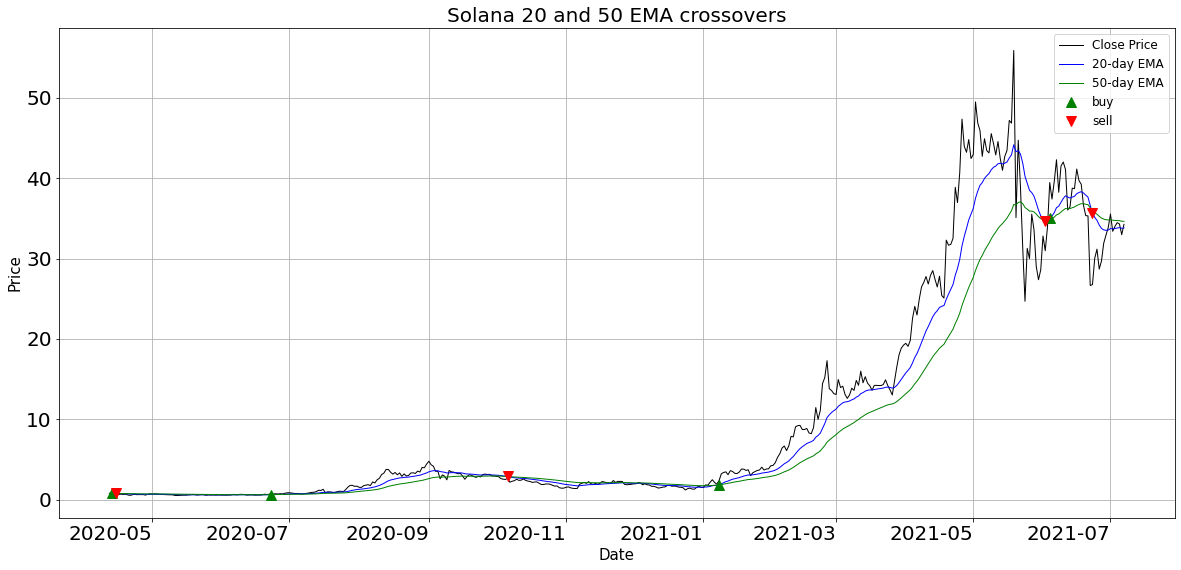

In [427]:
df_sol['20_EMA'] = df_sol['Close'].ewm(span = 20, adjust = False).mean()
# Create 50 days exponential moving average column
df_sol['50_EMA'] = df_sol['Close'].ewm(span = 50, adjust = False).mean()
# create a new column 'Signal' such that if 20-day EMA is greater   # than 50-day EMA then set Signal as 1 else 0
  
df_sol['Signal'] = 0.0  
df_sol['Signal'] = np.where(df_sol['20_EMA'] > df_sol['50_EMA'], 1.0, 0.0)
# create a new column 'Position' which is a day-to-day difference of # the 'Signal' column
df_sol['Position'] = df_sol['Signal'].diff()
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages 
df_sol['Close'].plot(color = 'k', lw = 1, label = 'Close Price')  
df_sol['20_EMA'].plot(color = 'b', lw = 1, label = '20-day EMA') 
df_sol['50_EMA'].plot(color = 'g', lw = 1, label = '50-day EMA')
# plot ‘buy’ and 'sell' signals
plt.plot(df_sol[df_sol['Position'] == 1].index, 
         df_sol['20_EMA'][df_sol['Position'] == 1], 
         '^', markersize = 10, color = 'g', label = 'buy')
plt.plot(df_sol[df_sol['Position'] == -1].index, 
         df_sol['20_EMA'][df_sol['Position'] == -1], 
         'v', markersize = 10, color = 'r', label = 'sell')
plt.ylabel('Price', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('SOL', fontsize = 20)
plt.legend(prop={'size': 30})
plt.xticks(fontsize=20,rotation = 0)
plt.yticks(fontsize=20)
plt.grid()
plt.legend(prop={'size': 12})
plt.title('Solana 20 and 50 EMA crossovers',size = 20)
plt.show()

## Bollinger Bands

Bollinger bands are a type of technical indicator that allows traders to analyze the volatility of a stock and whether the price is high or low on a relative basis. The top band is typically two standard deviations above the SMA and the bottom band is typically two standard deviations below the SMA. This is how the bands look like when they are graphed.

In [428]:
def get_sma(prices, rate):
    return prices.rolling(rate).mean()

def get_bollinger_bands(prices, rate=20):
    sma = get_sma(prices, rate)
    std = prices.rolling(rate).std()
    bollinger_up = sma + std * 2 # Calculate top band
    bollinger_down = sma - std * 2 # Calculate bottom band
    return bollinger_up, bollinger_down

In [429]:
bollinger_up, bollinger_down = get_bollinger_bands(df_xlm.loc['2018':]['Close'])

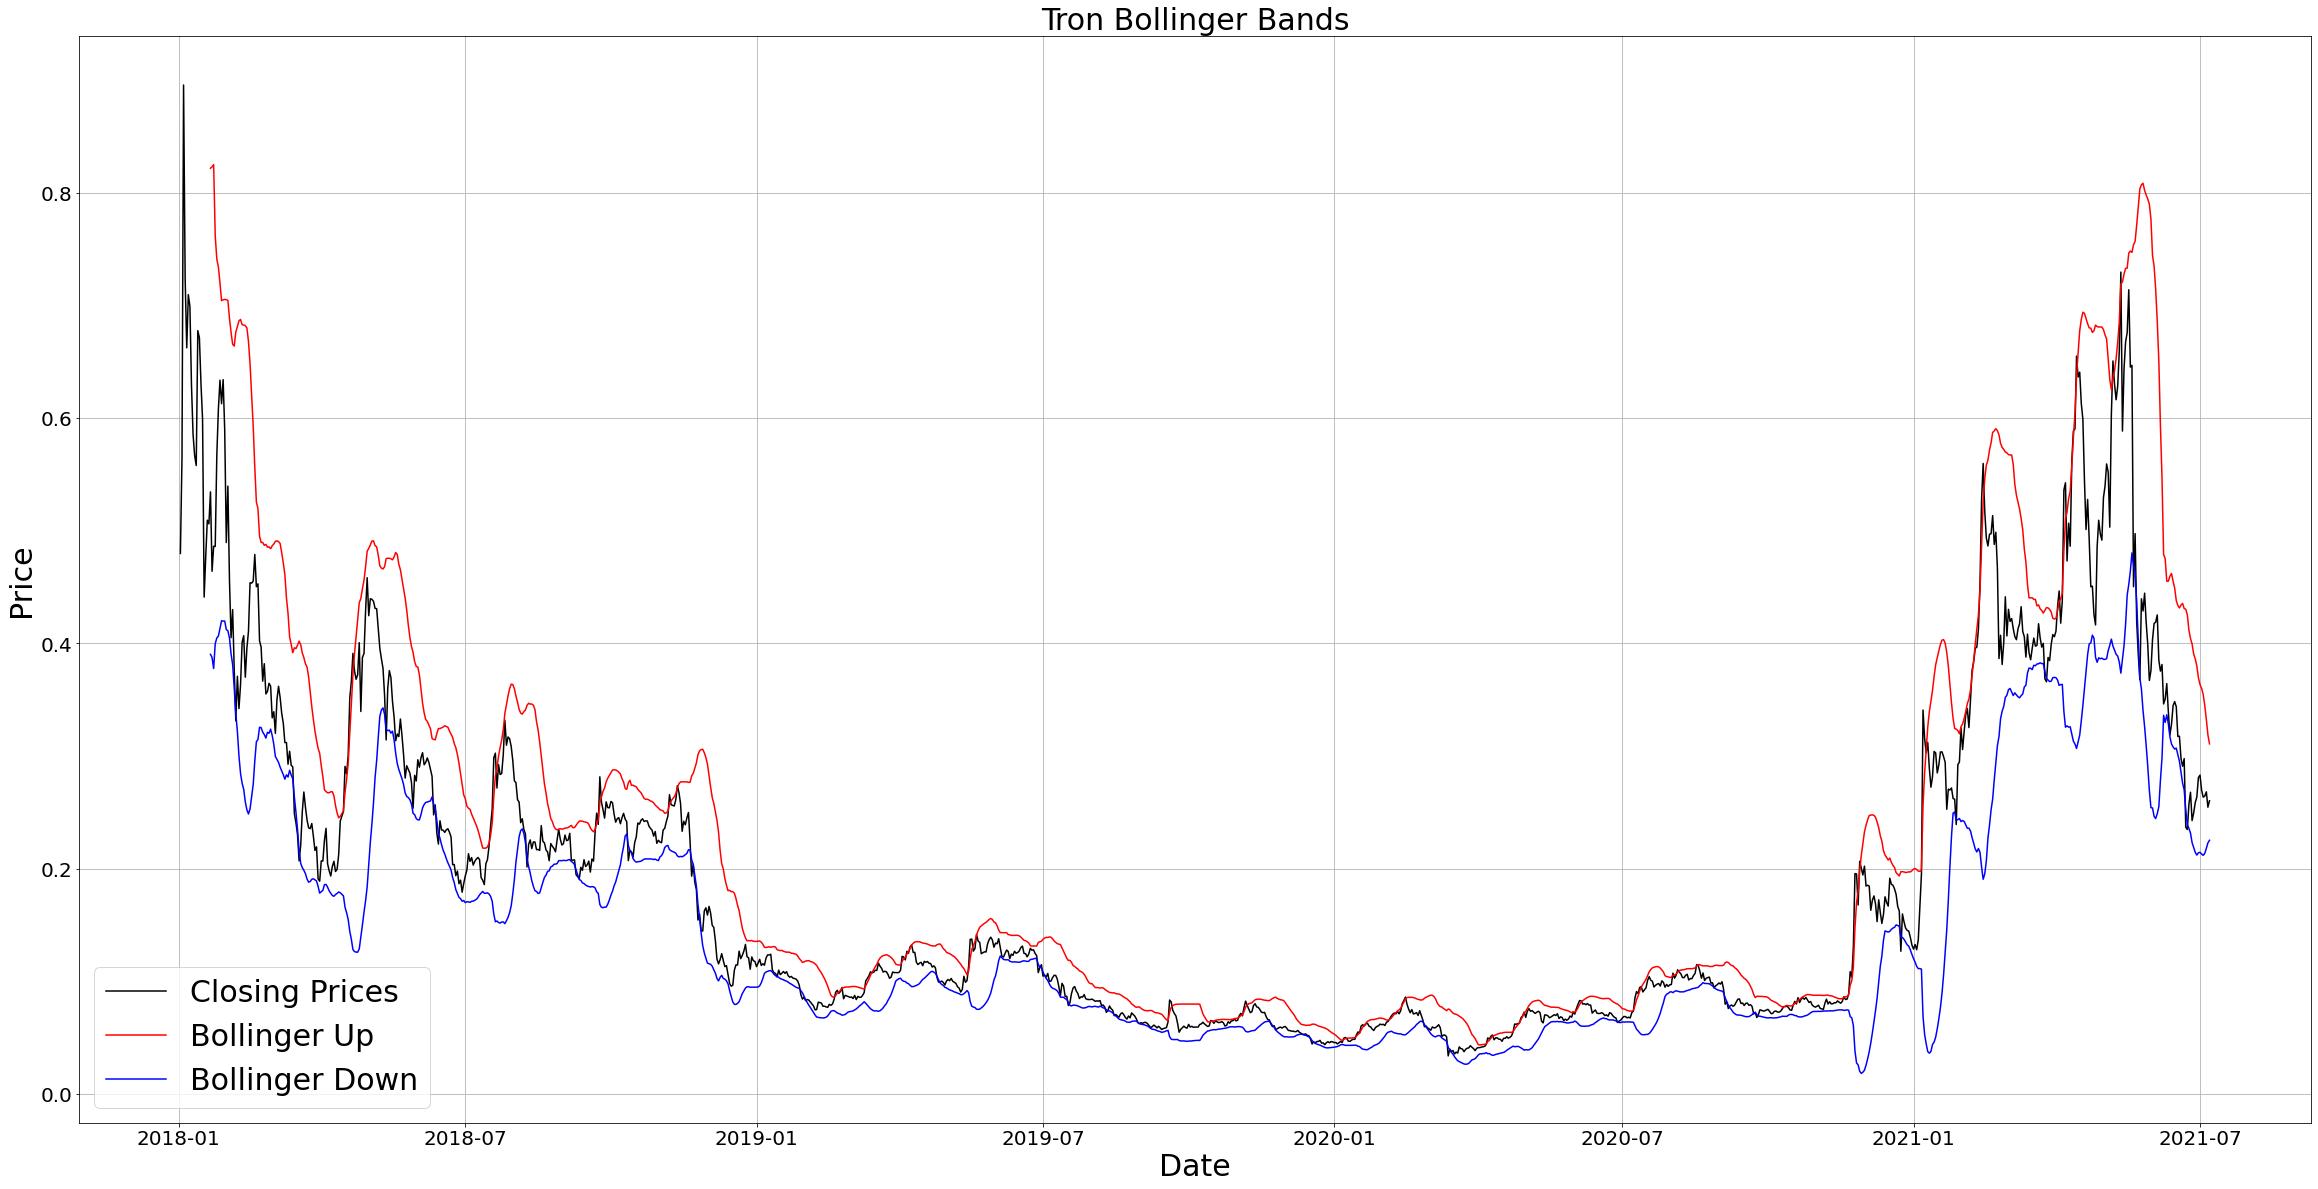

In [430]:
plt.figure(figsize=(40,20))
plt.title('Tron Bollinger Bands', size = 30)
plt.xlabel('Date', size = 30)
plt.ylabel('Price', size = 30)
plt.plot(df_xlm.loc['2018':]['Close'], label='Closing Prices', color = 'k')
plt.plot(bollinger_up, label='Bollinger Up', c='r')
plt.plot(bollinger_down, label='Bollinger Down', c='b')
plt.legend(prop={'size': 30})
plt.xticks(fontsize=20,rotation = 0)
plt.yticks(fontsize=20)
plt.grid()
plt.show()

We can observe that the closing prices of Tron mostly stay in between both the Bollinger bands. In addition, you can identify buy signals when the price line hits the lower band and sell signals when the price line hits the higher band.

## Extra

### Bitcoin price forecasting using LSTM Model

In [431]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
df_btc_lstm = df_btc[['Close']].values
df_btc_lstm = Ms.fit_transform(df_btc_lstm)

In [432]:
training_size = round(len(df_btc_lstm) * 0.9)

In [433]:
train_data = df_btc_lstm[:training_size]
test_data  = df_btc_lstm[training_size:]

In [434]:
len(train_data)

2692

In [435]:
# Create the training data set 
# Create the scaled training data set
train_data = df_btc_lstm[0:len(train_data), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

In [436]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=16, epochs=10)

Epoch 1/10


2022-04-08 02:22:03.722964: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-08 02:22:03.903355: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-08 02:22:04.028998: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-08 02:22:04.621121: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-08 02:22:05.025907: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


165/165 [==============================] - 9s 43ms/step - loss: 3.0366e-04
Epoch 2/10
165/165 [==============================] - 6s 36ms/step - loss: 6.2284e-05
Epoch 3/10
165/165 [==============================] - 6s 36ms/step - loss: 5.4638e-05
Epoch 4/10
165/165 [==============================] - 6s 36ms/step - loss: 3.8920e-05
Epoch 5/10
165/165 [==============================] - 6s 36ms/step - loss: 3.8625e-05
Epoch 6/10
165/165 [==============================] - 6s 36ms/step - loss: 3.7379e-05
Epoch 7/10
165/165 [==============================] - 6s 36ms/step - loss: 4.2225e-05
Epoch 8/10
165/165 [==============================] - 6s 36ms/step - loss: 3.3910e-05
Epoch 9/10
165/165 [==============================] - 6s 36ms/step - loss: 3.3821e-05
Epoch 10/10
165/165 [==============================] - 6s 36ms/step - loss: 7.9117e-05


In [437]:
data = df_btc.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values

In [439]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = df_btc_lstm[len(train_data) - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[len(train_data):, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = Ms.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2022-04-08 02:23:05.626351: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-08 02:23:05.659394: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-08 02:23:05.746681: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


3417.520526021182

In [444]:
X = np.append(dataset,predictions)
df_btc_lstm = np.append(df_btc_lstm,predictions)

In [447]:
X = X.reshape(-1,1)
df_btc_lstm = df_btc_lstm.reshape(-1,1)

In [459]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = df_btc_lstm[len(df_btc) - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = X[len(df_btc):, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = Ms.inverse_transform(predictions)

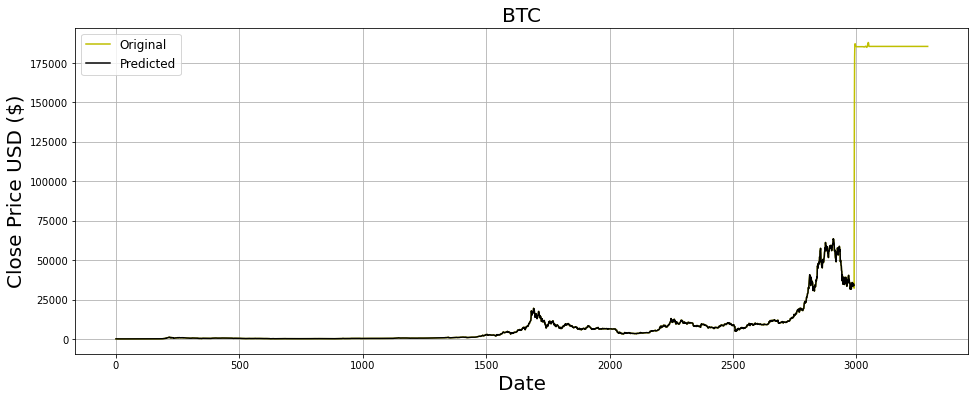

In [460]:
# Plot the data
train = dataset
predicted = np.append(dataset,predictions)
plt.figure(figsize=(16,6))
plt.title('BTC', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Close Price USD ($)', fontsize=20)
plt.plot(predicted, color = 'y')
plt.plot(train, color = 'k')
plt.legend(['Original','Predicted'], loc='upper left',prop={'size': 12})
plt.grid()
plt.show()

Oops! It looks like a mess. But it is normal for time series forecasting!